In [1]:
import sys
import os
copypath = ['../modules', 
            '../Train', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python27.zip', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/plat-linux2', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/lib-tk', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/lib-old', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/lib-dynload', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/site-packages', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/site-packages/setuptools-27.2.0-py2.7.egg']
for p in reversed(copypath):
    sys.path.insert(0, p)
print sys.path
os.environ['KERAS_BACKEND'] = 'tensorflow'
os.environ['DEEPJET'] = '../../DeepJet'
#os.environ['LD_LIBRARY_PATH'] = '../modules:%s'%os.environ['LD_LIBRARY_PATH']
#os.environ['PATH'] = '../scripts:%s'%os.environ['PATH']
#os.environ['CONDA_PREFIX'] = '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu'
#os.environ['LD_PRELOAD'] = '%s/lib/libmkl_core.so:%s/lib/libmkl_sequential.so'%(os.environ['CONDA_PREFIX'],os.environ['CONDA_PREFIX'])
import keras
keras.backend.set_image_data_format('channels_first')

['../modules', '../Train', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python27.zip', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/plat-linux2', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/lib-tk', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/lib-old', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/lib-dynload', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/site-packages', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/site-packages/setuptools-27.2.0-py2.7.egg', '', '/opt/conda/envs/python2/lib/python27.zip', '/opt/conda/envs/python2/lib/python2.7', '/opt/conda/envs/python2/lib/python2.7/plat-linux2', '/opt/conda/envs/python2/lib/python2.7/li

Using TensorFlow backend.


In [2]:
!nvidia-smi

Thu Aug 24 16:10:44 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 375.66                 Driver Version: 375.66                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 0000:04:00.0     Off |                  N/A |
| 27%   35C    P8     9W / 180W |    185MiB /  8114MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 1080    Off  | 0000:05:00.0     Off |                  N/A |
| 27%   29C    P8     9W / 180W |      2MiB /  8114MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [8]:

from keras.models import load_model
from testing import testDescriptor
from argparse import ArgumentParser
from keras import backend as K
from Losses import * #needed!
import os
import numpy as np
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt

setGPU: Setting GPU to: 0


In [9]:
def makeRoc(testd, model, outputDir):
    from sklearn.metrics import roc_curve, auc
    from root_numpy import array2root
    import pandas as pd

    ## # summarize history for loss for training and test sample
    ## plt.figure(1)
    ## plt.plot(callbacks.history.history['loss'])
    ## plt.plot(callbacks.history.history['val_loss'])
    ## plt.title('model loss')
    ## plt.ylabel('loss')
    ## plt.xlabel('epoch')
    ## plt.legend(['train', 'test'], loc='upper left')
    ## plt.savefig(self.outputDir+'learningcurve.pdf') 
    ## plt.close(1)

    ## plt.figure(2)
    ## plt.plot(callbacks.history.history['acc'])
    ## plt.plot(callbacks.history.history['val_acc'])
    ## plt.title('model accuracy')
    ## plt.ylabel('acc')
    ## plt.xlabel('epoch')
    ## plt.legend(['train', 'test'], loc='upper left')
    ## plt.savefig(self.outputDir+'accuracycurve.pdf')
    ## plt.close(2)

    print 'in makeRoc()'
    features_val=testd.getAllFeatures() 
    labels_val=testd.getAllLabels()[0]
    weights_val=testd.getAllWeights()[0]
    
    # let's use only first 1000 entries
    NENT = 1000
    features_val = [fval[:NENT] for fval in features_val]
    labels_val = labels_val[:NENT,:]
    weights_val = weights_val[:NENT]
    
    df = pd.DataFrame(testd.getAllSpectators()[0][:NENT,0,:])
    df.columns = ['fj_pt',
                  'fj_eta',
                  'fj_sdmass',
                  'fj_n_sdsubjets',
                  'fj_doubleb',
                  'fj_tau21',
                  'fj_tau32',
                  'npv',
                  'npfcands',
                  'ntracks',
                  'nsv']

    print(df.iloc[:10])

        
    predict_test = model.predict(features_val)
    df['fj_isH'] = labels_val[:,1]
    df['fj_deepdoubleb'] = predict_test[:,1]

    print(df.iloc[:10])

    fpr, tpr, threshold = roc_curve(df['fj_isH'],df['fj_deepdoubleb'])
    dfpr, dtpr, threshold1 = roc_curve(df['fj_isH'],df['fj_doubleb'])

    def find_nearest(array,value):
        idx = (np.abs(array-value)).argmin()
        return idx, array[idx]

    value = 0.01 # 1% mistag rate
    idx, val = find_nearest(fpr, value)
    deepdoublebcut = threshold[idx] # threshold for deep double-b corresponding to ~1% mistag rate
    print('deep double-b > %f coresponds to %f%% QCD mistag rate'%(deepdoublebcut,100*val))

    auc1 = auc(fpr, tpr)
    auc2 = auc(dfpr, dtpr)

    plt.figure()       
    plt.plot(tpr,fpr,label='deep double-b, auc = %.1f%%'%(auc1*100))
    plt.plot(dtpr,dfpr,label='BDT double-b, auc = %.1f%%'%(auc2*100))
    plt.semilogy()
    plt.xlabel("H(bb) efficiency")
    plt.ylabel("QCD mistag rate")
    plt.ylim(0.001,1)
    plt.grid(True)
    plt.legend()
    plt.savefig(outputDir+"test.pdf")
    
    plt.figure()
    bins = np.linspace(-1,1,70)
    plt.hist(df['fj_doubleb'], bins=bins, weights = 1-df['fj_isH'],alpha=0.5,normed=True,label='QCD')
    plt.hist(df['fj_doubleb'], bins=bins, weights = df['fj_isH'],alpha=0.5,normed=True,label='H(bb)')
    plt.xlabel("BDT double-b")
    plt.legend(loc='upper left')
    plt.savefig(outputDir+"doubleb.pdf")
    
    plt.figure()
    bins = np.linspace(0,1,70)
    plt.hist(df['fj_deepdoubleb'], bins=bins, weights = 1-df['fj_isH'],alpha=0.5,normed=True,label='QCD')
    plt.hist(df['fj_deepdoubleb'], bins=bins, weights = df['fj_isH'],alpha=0.5,normed=True,label='H(bb)')
    plt.xlabel("deep double-b")
    plt.legend(loc='upper left')
    plt.savefig(outputDir+"deepdoubleb.pdf")
    
    plt.figure()
    bins = np.linspace(0,2000,70)
    plt.hist(df['fj_pt'], bins=bins, weights = 1-df['fj_isH'],alpha=0.5,normed=True,label='QCD')
    plt.hist(df['fj_pt'], bins=bins, weights = df['fj_isH'],alpha=0.5,normed=True,label='H(bb)')
    plt.xlabel(r'$p_{\mathrm{T}}$')
    plt.legend(loc='upper left')
    plt.savefig(outputDir+"pt.pdf")
    
    plt.figure()
    bins = np.linspace(0,200,70)
    plt.hist(df['fj_sdmass'], bins=bins, weights = 1-df['fj_isH'],alpha=0.5,normed=True,label='QCD')
    plt.hist(df['fj_sdmass'], bins=bins, weights = df['fj_isH'],alpha=0.5,normed=True,label='H(bb)')
    plt.xlabel(r'$m_{\mathrm{SD}}$')
    plt.legend(loc='upper left')
    plt.savefig(outputDir+"msd.pdf")
    
    plt.figure()
    bins = np.linspace(0,200,70)
    df_passdoubleb = df[df.fj_doubleb > 0.9]
    plt.hist(df_passdoubleb['fj_sdmass'], bins=bins, weights = 1-df_passdoubleb['fj_isH'],alpha=0.5,normed=True,label='QCD')
    plt.hist(df_passdoubleb['fj_sdmass'], bins=bins, weights = df_passdoubleb['fj_isH'],alpha=0.5,normed=True,label='H(bb)')
    plt.xlabel(r'$m_{\mathrm{SD}}$')
    plt.legend(loc='upper left')
    plt.savefig(outputDir+"msd_passdoubleb.pdf")
    
    plt.figure()
    bins = np.linspace(0,200,70)
    df_passdeepdoubleb = df[df.fj_deepdoubleb > deepdoublebcut]
    plt.hist(df_passdeepdoubleb['fj_sdmass'], bins=bins, weights = 1-df_passdeepdoubleb['fj_isH'],alpha=0.5,normed=True,label='QCD')
    plt.hist(df_passdeepdoubleb['fj_sdmass'], bins=bins, weights = df_passdeepdoubleb['fj_isH'],alpha=0.5,normed=True,label='H(bb)')
    plt.xlabel(r'$m_{\mathrm{SD}}$')
    plt.legend(loc='upper left')
    plt.savefig(outputDir+"msd_passdeepdoubleb.pdf")
    
    return

/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


in makeRoc()
         fj_pt    fj_eta   fj_sdmass  fj_n_sdsubjets  fj_doubleb  fj_tau21  \
0  1341.753906 -0.857475   31.955616             2.0   -0.338851  0.574746   
1  1199.216431  0.672301  184.797302             2.0    0.345067  0.597914   
2  1198.793457  0.374637    7.449878             2.0   -0.271641  0.871469   
3  1008.766174  0.051419  208.817795             2.0   -0.737059  0.481590   
4  1217.592773 -0.273299    9.561430             2.0   -0.867258  0.825349   
5  1177.484009 -0.108096   52.555882             2.0   -0.877467  0.780244   
6  1038.037109  0.849492   16.399689             2.0   -0.750770  0.711005   
7   994.958618  0.011310    9.822352             2.0   -0.557818  0.640318   
8  1261.527100 -0.128758   11.176943             2.0   -0.852823  0.663784   
9  1183.607300 -0.916067   11.959915             2.0    0.070836  0.670363   

   fj_tau32   npv  npfcands  ntracks  nsv  
0  0.830599  12.0      39.0     24.0  1.0  
1  0.405185  12.0      98.0     60.0  4.

/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6097: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 0 x 1)
  '(shape is %d x %d)' % inp.shape[::-1])
/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6201: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


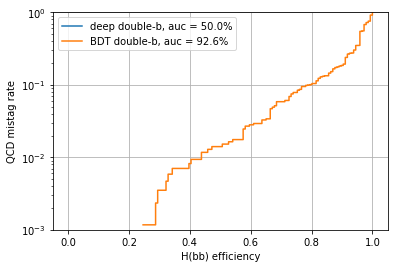

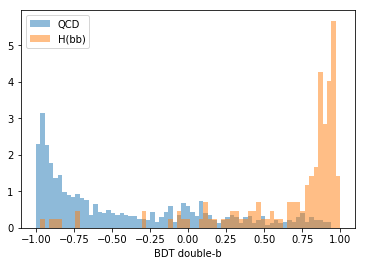

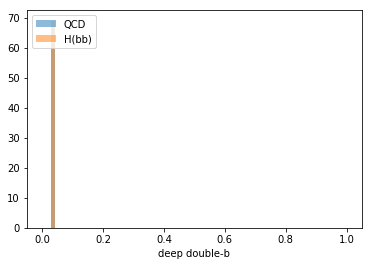

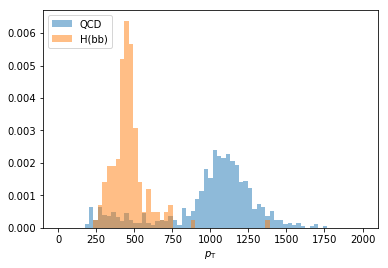

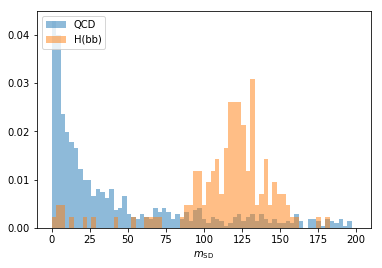

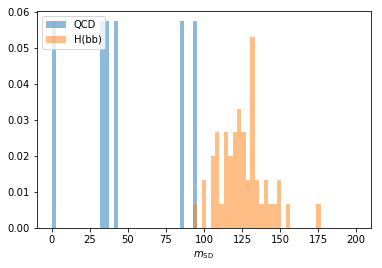

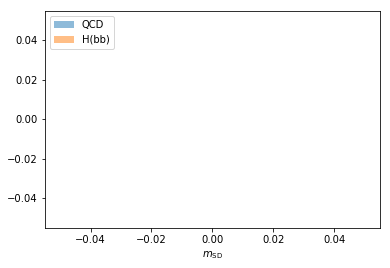

In [11]:
import imp
try:
    imp.find_module('setGPU')
    import setGPU
except ImportError:
    found = False

#inputModel = '/inputdata/BumbleB/jduarte/DeepJet/Train/train_Resnet_sv/KERAS_check_best_model.h5'
inputModel = 'train_Resnet_sv/KERAS_check_best_model.h5'
outputDir = 'out_Resnet_sv/'
inputDataCollection = '/inputdata/BumbleB/convert_deepDoubleB_init_test/dataCollection.dc'

if os.path.isdir(outputDir):
    raise Exception('output directory must not exists yet')
else: 
    os.mkdir(outputDir)

model=load_model(inputModel, custom_objects=global_loss_list)
    
#print(model.summary())
    
td=testDescriptor()
    
from DataCollection import DataCollection
    
testd=DataCollection()
testd.readFromFile(inputDataCollection)
    
makeRoc(testd, model, outputDir)